In [1]:
import pulp

# Definir el problema de optimización
model = pulp.LpProblem("Optimización_de_Producción", pulp.LpMaximize)

# Definir las variables de decisión (continuas)
x1 = pulp.LpVariable('Chamarras', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('RellenoPlumas', lowBound=0, cat='Continuous')
x3 = pulp.LpVariable('Pantalones', lowBound=0, cat='Continuous')
x4 = pulp.LpVariable('Guantes', lowBound=0, cat='Continuous')

# Definir la función objetivo
model += 45 * x1 + 60 * x2 + 30 * x3 + 18 * x4, "Función Objetivo"

# Definir las restricciones de capacidad
model += 0.30 * x1 + 0.30 * x2 + 0.25 * x3 + 0.15 * x4 <= 1000, "Corte"
model += 0.25 * x1 + 0.35 * x2 + 0.30 * x3 + 0.10 * x4 <= 1000, "Aislamiento"
model += 0.45 * x1 + 0.50 * x2 + 0.40 * x3 + 0.22 * x4 <= 1000, "Costura"
model += 0.15 * x1 + 0.15 * x2 + 0.10 * x3 + 0.05 * x4 <= 1000, "Empaque"

# Restricciones de demanda
model += x1 <= 800, "Demanda Chamarras"
model += x2 <= 750, "Demanda Relleno Plumas"
model += x3 <= 600, "Demanda Pantalones"
model += x4 <= 500, "Demanda Guantes"

# Resolver el problema
model.solve()

# Mostrar los resultados
print("Chamarras producidas:", pulp.value(x1))
print("Relleno de plumas producido:", pulp.value(x2))
print("Pantalones producidos:", pulp.value(x3))
print("Guantes producidos:", pulp.value(x4))
print("Valor de la función objetivo:", pulp.value(model.objective) - 37000)


Chamarras producidas: 800.0
Relleno de plumas producido: 750.0
Pantalones producidos: 387.5
Guantes producidos: 500.0
Valor de la función objetivo: 64625.0


In [2]:
import pulp

# Definir el problema de optimización
model = pulp.LpProblem("Optimización_de_Producción", pulp.LpMaximize)

# Definir las variables de decisión (enteras)
x1 = pulp.LpVariable('Chamarras', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('RellenoPlumas', lowBound=0, cat='Integer')
x3 = pulp.LpVariable('Pantalones', lowBound=0, cat='Integer')
x4 = pulp.LpVariable('Guantes', lowBound=0, cat='Integer')

# Definir la función objetivo
model += 45 * x1 + 60 * x2 + 30 * x3 + 18 * x4, "Función Objetivo"

# Definir las restricciones de capacidad
model += 0.30 * x1 + 0.30 * x2 + 0.25 * x3 + 0.15 * x4 <= 1000, "Corte"
model += 0.25 * x1 + 0.35 * x2 + 0.30 * x3 + 0.10 * x4 <= 1000, "Aislamiento"
model += 0.45 * x1 + 0.50 * x2 + 0.40 * x3 + 0.22 * x4 <= 1000, "Costura"
model += 0.15 * x1 + 0.15 * x2 + 0.10 * x3 + 0.05 * x4 <= 1000, "Empaque"

# Restricciones de demanda
model += x1 <= 800, "Demanda Chamarras"
model += x2 <= 750, "Demanda Relleno Plumas"
model += x3 <= 600, "Demanda Pantalones"
model += x4 <= 500, "Demanda Guantes"

# Resolver el problema
model.solve()

# Mostrar los resultados
print("Chamarras producidas:", pulp.value(x1))
print("Relleno de plumas producido:", pulp.value(x2))
print("Pantalones producidos:", pulp.value(x3))
print("Guantes producidos:", pulp.value(x4))
print("Valor de la función objetivo:", pulp.value(model.objective) - 37000)


Chamarras producidas: 800.0
Relleno de plumas producido: 750.0
Pantalones producidos: 388.0
Guantes producidos: 499.0
Valor de la función objetivo: 64622.0


# Comparación entre variables continuas y enteras
Cuando el modelo se resuelve con variables continuas, el solver puede devolver números fraccionarios. Esto puede no ser práctico en el contexto de producción, ya que es probable que no puedas producir una fracción de un producto.
Cuando se impone que las variables sean enteras, el solver buscará una solución en la que todas las variables sean números enteros. Esto puede llevar a una solución ligeramente diferente y posiblemente una función objetivo con un valor más bajo.

Producción óptima por mes: [205.0, 225.0, 190.0, 160.0, 225.0, 225.0]
Inventario óptimo por mes: [25.0, 0.0, 0.0, 20.0, 25.0, 0.0]
Costo total óptimo: 61795.0
Producción no óptima por mes: [180, 250, 190, 140, 220, 250]
Costo total no óptimo: 61040
Ahorro con la solución óptima: -755.0
   Mes  Producción Óptima  Inventario Óptimo  Producción No Óptima  \
0    1              205.0               25.0                   180   
1    2              225.0                0.0                   250   
2    3              190.0                0.0                   190   
3    4              160.0               20.0                   140   
4    5              225.0               25.0                   220   
5    6              225.0                0.0                   250   

   Costo Producción Óptima  Costo Inventario Óptimo  Costo Total Óptimo  \
0                  10250.0                    200.0             10450.0   
1                  10125.0                      0.0             10125.0 

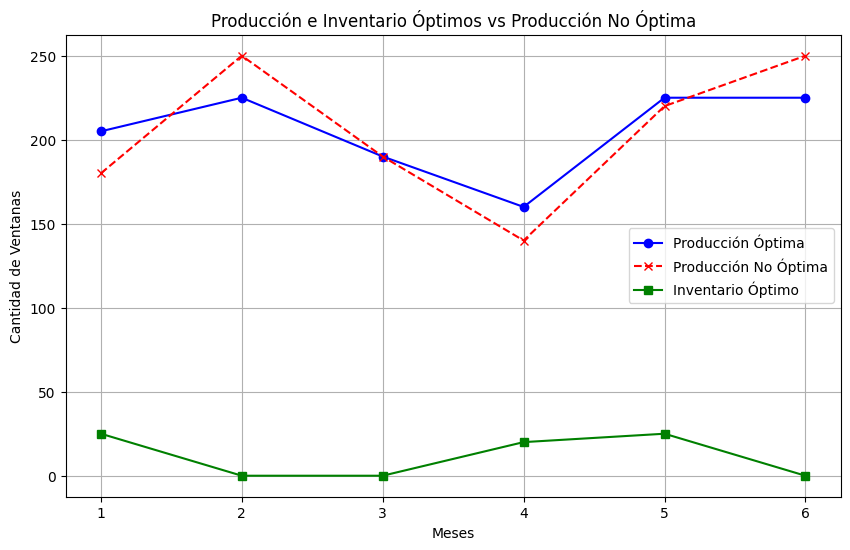

In [3]:
import pulp
import matplotlib.pyplot as plt

# Parámetros del problema
costos_produccion = [50, 45, 55, 52, 48, 50]
costos_almacenaje = [8, 10, 10, 10, 8, 8]
demanda = [180, 250, 190, 140, 220, 250]
capacidad_max = 225

# Crear el problema de programación lineal
modelo = pulp.LpProblem("Produccion_optima", pulp.LpMinimize)

# Definir las variables de decisión
x = [pulp.LpVariable(f"x{t+1}", lowBound=0, cat='Continuous') for t in range(6)]
I = [pulp.LpVariable(f"I{t+1}", lowBound=0, cat='Continuous') for t in range(6)]

# Función objetivo: minimizar costos de producción y almacenamiento
modelo += pulp.lpSum([costos_produccion[t] * x[t] for t in range(6)]) + \
          pulp.lpSum([costos_almacenaje[t] * I[t] for t in range(6)])

# Restricciones de demanda e inventario
modelo += I[0] == x[0] - demanda[0]
for t in range(1, 6):
    modelo += I[t] == I[t-1] + x[t] - demanda[t]

# Restricciones de capacidad de producción
for t in range(6):
    modelo += x[t] <= capacidad_max

# Resolver el modelo
modelo.solve()

# Resultados de la solución óptima
produccion_optima = [pulp.value(x[t]) for t in range(6)]
inventario_optimo = [pulp.value(I[t]) for t in range(6)]
costo_total_optimo = pulp.value(modelo.objective)

# Mostrar los resultados
print("Producción óptima por mes:", produccion_optima)
print("Inventario óptimo por mes:", inventario_optimo)
print("Costo total óptimo:", costo_total_optimo)

# Solución no óptima: Producción igual a la demanda
produccion_no_optima = demanda
inventario_no_optimo = [0] * 6  # No hay inventarios en la solución no óptima
costo_produccion_no_optima = sum(costos_produccion[t] * produccion_no_optima[t] for t in range(6))
costo_total_no_optima = costo_produccion_no_optima  # No hay costo de inventario

# Mostrar los resultados de la solución no óptima
print("Producción no óptima por mes:", produccion_no_optima)
print("Costo total no óptimo:", costo_total_no_optima)

# Comparar ambos costos
ahorro = costo_total_no_optima - costo_total_optimo
print("Ahorro con la solución óptima:", ahorro)

# Crear una tabla de comparación mes a mes
import pandas as pd

data = {
    "Mes": [1, 2, 3, 4, 5, 6],
    "Producción Óptima": produccion_optima,
    "Inventario Óptimo": inventario_optimo,
    "Producción No Óptima": produccion_no_optima,
    "Costo Producción Óptima": [costos_produccion[t] * produccion_optima[t] for t in range(6)],
    "Costo Inventario Óptimo": [costos_almacenaje[t] * inventario_optimo[t] for t in range(6)],
    "Costo Total Óptimo": [
        costos_produccion[t] * produccion_optima[t] + costos_almacenaje[t] * inventario_optimo[t]
        for t in range(6)
    ],
    "Costo Producción No Óptima": [costos_produccion[t] * produccion_no_optima[t] for t in range(6)],
}

df = pd.DataFrame(data)
print(df)

# Crear gráficos de comparación

meses = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(10, 6))

# Graficar producción óptima y no óptima
plt.plot(meses, produccion_optima, label='Producción Óptima', marker='o', color='b')
plt.plot(meses, produccion_no_optima, label='Producción No Óptima', marker='x', color='r', linestyle='--')

# Graficar inventario óptimo
plt.plot(meses, inventario_optimo, label='Inventario Óptimo', marker='s', color='g')

# Configuración de la gráfica
plt.title('Producción e Inventario Óptimos vs Producción No Óptima')
plt.xlabel('Meses')
plt.ylabel('Cantidad de Ventanas')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    "Mes": [1, 2, 3, 4, 5, 6],
    "Producción Óptima": [205.0, 225.0, 190.0, 160.0, 225.0, 225.0],
    "Inventario Óptimo": [25.0, 0.0, 0.0, 20.0, 25.0, 0.0],
    "Producción No Óptima": [180, 250, 190, 140, 220, 250],
    "Costo Producción Óptima": [10250.0, 10125.0, 10450.0, 8320.0, 10800.0, 11250.0],
    "Costo Inventario Óptimo": [200.0, 0.0, 0.0, 200.0, 200.0, 0.0],
    "Costo Total Óptimo": [10450.0, 10125.0, 10450.0, 8520.0, 11000.0, 11250.0],
    "Costo Producción No Óptima": [9000, 11250, 10450, 7280, 10560, 12500]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla
import ace_tools as tools; tools.display_dataframe_to_user(name="Tabla de Comparación de Costos", dataframe=df)


ModuleNotFoundError: No module named 'ace_tools'

In [7]:
import pulp

# Crear el problema de programación lineal (con restricciones enteras)
modelo_enteros = pulp.LpProblem("Produccion_optima_enteros", pulp.LpMinimize)

# Definir las variables de decisión como enteras
x_enteros = [pulp.LpVariable(f"x{t+1}", lowBound=0, cat='Integer') for t in range(6)]
I_enteros = [pulp.LpVariable(f"I{t+1}", lowBound=0, cat='Integer') for t in range(6)]

# Función objetivo: minimizar costos de producción y almacenamiento
modelo_enteros += pulp.lpSum([costos_produccion[t] * x_enteros[t] for t in range(6)]) + \
          pulp.lpSum([costos_almacenaje[t] * I_enteros[t] for t in range(6)])

# Restricciones de demanda e inventario
modelo_enteros += I_enteros[0] == x_enteros[0] - demanda[0]
for t in range(1, 6):
    modelo_enteros += I_enteros[t] == I_enteros[t-1] + x_enteros[t] - demanda[t]

# Restricciones de capacidad de producción
for t in range(6):
    modelo_enteros += x_enteros[t] <= capacidad_max

# Resolver el modelo
modelo_enteros.solve()

# Resultados de la solución con variables enteras
produccion_optima_enteros = [pulp.value(x_enteros[t]) for t in range(6)]
inventario_optimo_enteros = [pulp.value(I_enteros[t]) for t in range(6)]
costo_total_optimo_enteros = pulp.value(modelo_enteros.objective)

# Mostrar los resultados
print("Producción óptima (enteros) por mes:", produccion_optima_enteros)
print("Inventario óptimo (enteros) por mes:", inventario_optimo_enteros)
print("Costo total óptimo (enteros):", costo_total_optimo_enteros)

# Comparación de resultados con la solución continua
print("Diferencia en costos:", costo_total_optimo_enteros - costo_total_optimo)


Producción óptima (enteros) por mes: [205.0, 225.0, 190.0, 160.0, 225.0, 225.0]
Inventario óptimo (enteros) por mes: [25.0, 0.0, 0.0, 20.0, 25.0, 0.0]
Costo total óptimo (enteros): 61795.0
Diferencia en costos: 0.0
